In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [5]:
data = pd.read_csv('titanic-2.csv')

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.drop(columns=['Name','PassengerId','Cabin'])

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(3)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


# Encoding

In [14]:
new_data = data[['Sex']]
pd.get_dummies(new_data)

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [15]:
one = OneHotEncoder(drop='first')
data['Sex'] = one.fit_transform(new_data).toarray()

In [16]:
label = LabelEncoder()
data['Ticket'] = label.fit_transform(data['Ticket'])
data['Embarked'] = label.fit_transform(data['Embarked'])

In [17]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,407,7.2500,2
1,1,1,0.0,38.0,1,0,470,71.2833,0
2,1,3,0.0,26.0,0,0,531,7.9250,2
3,1,1,0.0,35.0,1,0,39,53.1000,2
4,0,3,1.0,35.0,0,0,372,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0.0,39.0,0,5,376,29.1250,1
886,0,2,1.0,27.0,0,0,82,13.0000,2
887,1,1,0.0,19.0,0,0,12,30.0000,2
889,1,1,1.0,26.0,0,0,8,30.0000,0


# Data Spliting

In [18]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [19]:
data['Survived'].value_counts()

Survived
0    424
1    285
Name: count, dtype: int64

In [20]:
model = RandomUnderSampler(random_state=42)
x,y=model.fit_resample(x,y)

In [21]:
y.value_counts()

Survived
0    285
1    285
Name: count, dtype: int64

In [22]:
x.shape

(570, 8)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# GridsearchCV for Best Hyperperameter

In [24]:
model = DecisionTreeClassifier()

In [25]:
pera = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [None,1,2,3,4,5,6,7,8,9],
    'max_leaf_nodes' : [i for i in range(1,21)],
    'min_samples_leaf' : [1,2,3,4,5,6,7]
}

In [26]:
grid = GridSearchCV(estimator=model,param_grid=pera,cv=5,n_jobs=1)
grid.fit(X_train,Y_train)

c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1050 fits failed out of a total of 21000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19,
                                            20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]})

In [27]:
best_param = grid.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 4}

In [28]:
model = DecisionTreeClassifier(random_state=42,**best_param)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_leaf=4,
                       random_state=42)

In [29]:
Y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(Y_test,Y_pred)*100
accuracy

82.45614035087719

In [31]:
score = classification_report(Y_test,Y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.79      0.82      0.81        51

    accuracy                           0.82       114
   macro avg       0.82      0.82      0.82       114
weighted avg       0.83      0.82      0.82       114



# Visualization

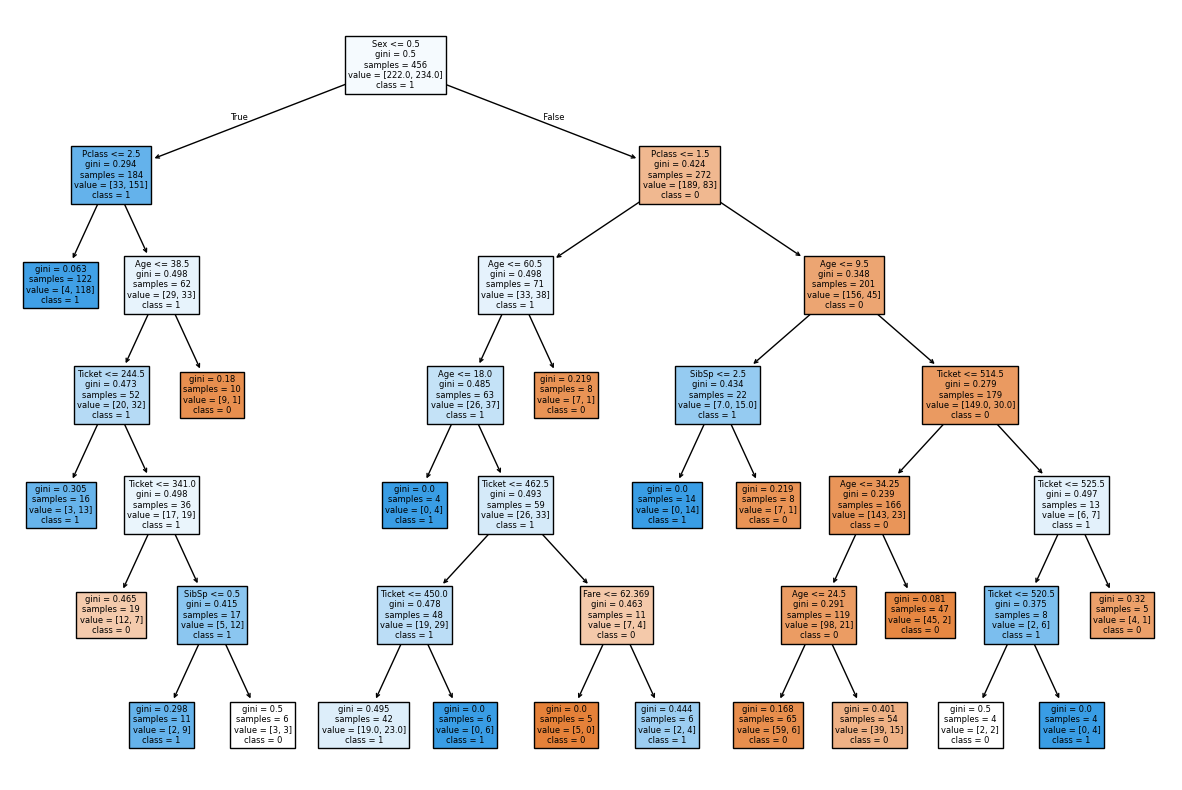

In [32]:
plt.figure(figsize=(15,10))
plot_tree(model,class_names=y.unique().astype(str),feature_names=x.columns,filled=True)
plt.show()

In [33]:
confusion = confusion_matrix(Y_test,Y_pred)
confusion

array([[52, 11],
       [ 9, 42]])

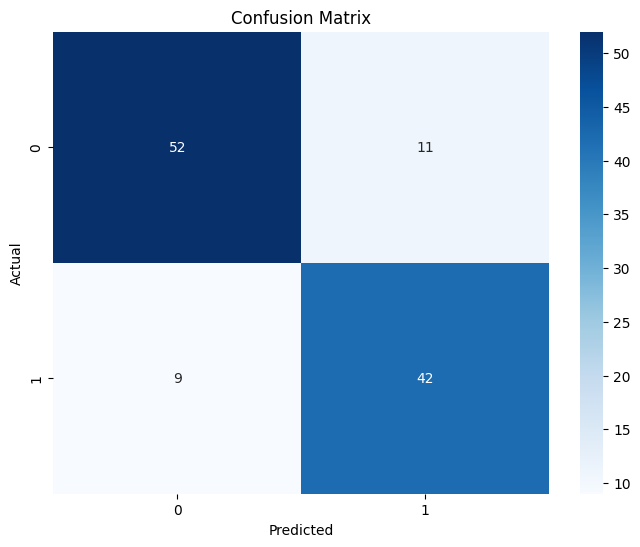

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()